### Introduction

**Capacitated Vehicle Routing Problem (CVRP)**
* A depot must supply goods to a number of customers.

* Each customer has a known demand.

* A fleet of identical vehicles (with limited capacity) must deliver to all customers.

* The goal is to minimize total travel cost (or distance), subject to capacity constraints and routing feasibility.


**Parameters**

N={1,...,n}: set of client nodes (0 is the depot)

V={0,1,...,n}: set of vetics (or nodes) (0 is the depot, others are client)

A: set of arcs, with A={ (i, j) $\in$ $V^2$: i !=j}  

$c_ij$: cost (distance or time) from node i to j

$d_i$: demand of customer i (with $d_0$=0)

Q: capacity of each vehicle

q: is the amount that has to be delivered to customer i $\in$ N


**Decision Variables**

$x_{ij}$: 1 if the vehicle travels directly from i to j, 0 otherwise

$u_i$: load (or cumulative load) at node i, used for subtour elimination. Without this 
variable, we cannot make circle routes


**Objective Function**

$$
min \sum_{i,j \in A} x_{ij}c_{ij} 
$$


**Constraints**

Each client is visited exactly once:

$$
\sum_{j \in V,\, j \ne i} x_{ij} = 1   -----       i \in N
$$

$$
\sum_{i \in V,\, i \ne j} x_{ij} = 1    -----      j \in N
$$

Subtour Elimination (MTZ formulation):

                                   if xij = 1, then ui + qj = uj   i, j in A: j!=0, i!=0
                                   
$$
q_i \le u_i \le Q  ----- i \in N
$$

Binary decision variable:

$$
x_{ij} \in {0,1} ----- i,j \in A
$$




**Explanation on Subtour Elimination**

If arc (i, j) is used ($x_{ij}$ = 1), then enforce $u_i$ + $q_j$ = $u_j$

it is equivalent to the statement as follows:

$u_i$ + $q_j$ - $u_j$ <= M(1-$x_{ij}$)
$u_i$ + $q_j$ - $u_j$ >= M(1-$x_{ij}$)

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from gurobipy import Model, GRB, quicksum
from collections import defaultdict
from itertools import cycle

### Create coodinators for clients

In [28]:
rnd = np.random
rnd.seed(0)
n = 20  # numbre of clients
xc = rnd.rand(n+1)*200
yc = rnd.rand(n+1)*100

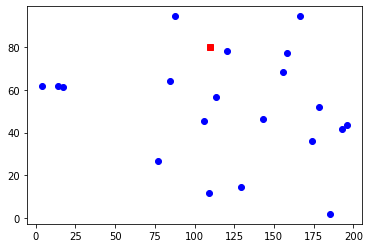

In [91]:
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='b')    
plt.show()

### Modeling

In [30]:
N = [i for i in range(1, n+1)]
V = [0] + N
A = [(i, j) for i in V for j in V if i != j]
c = {(i, j): np.hypot(xc[i]-xc[j], yc[i]-yc[j]) for i, j in A}
Q = 20
q = {i: rnd.randint(1, 10) for i in N}

In [31]:
model = Model('CVRP')
x = model.addVars(A, vtype=GRB.BINARY, name='x')
u = model.addVars(N, vtype=GRB.CONTINUOUS, name='u')

model.setObjective(quicksum(x[i, j]*c[i, j] for i, j in A), GRB.MINIMIZE)

model.addConstrs(quicksum(x[i, j] for j in V if j != i) == 1 for i in N)
model.addConstrs(quicksum(x[i, j] for i in V if i != j) == 1 for j in N)
model.addConstrs((x[i, j] == 1) >> (u[i]+q[j] == u[j])
               for i, j in A if i != 0 and j != 0)
model.addConstrs(u[i] >= q[i] for i in N)
model.addConstrs(u[i] <= Q for i in N)

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>,
 20: <gurobi.Constr *Awaiting Model Update*>}

### Set parameter to allow stoping early to get good solution instead of optimal solution

In [32]:
# You can stop early if you're 10% away from the optimal solution.
model.Params.MIPGap = 0.1  # Set a 1% optimality gap
model.Params.TimeLimit = 30  # # Stop solving after 30 seconds
model.optimize()

Set parameter MIPGap to value 0.1
Set parameter TimeLimit to value 30
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[x86] - Darwin 19.6.0 19H2026)

CPU model: Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 80 rows, 440 columns and 840 nonzeros
Model fingerprint: 0xb42b2df9
Model has 380 general constraints
Variable types: 20 continuous, 420 integer (420 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
  GenCon rhs range [1e+00, 9e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 578 rows and 76 columns
Presolve time: 0.07s
Presolved: 658 rows, 516 columns, 2892 nonzeros
Variable types: 96 continuous, 420 integer (420 binary)
Found heuristic solution: objective 2540.4720602
Found heuristic solution: objective 2454.9075993
Found heuristic solution: objective 2392.414

In [67]:
from collections import defaultdict

active_arcs_dic = defaultdict(list)
for i, j in active_arcs:
    active_arcs_dic[i].append((i, j))

route_circles = []
for i, j in active_arcs_dic[0]:
    route_circles.append([(i, j)])
    start, end = j, active_arcs_dic[j][0][1]
    while end != 0:
        route_circles[-1].append((start, end))
        start, end = end, active_arcs_dic[end][0][1]
    else:
        route_circles[-1].append((start, end))
route_circles  

[[(0, 2), (2, 0)],
 [(0, 6), (6, 16), (16, 14), (14, 15), (15, 0)],
 [(0, 7), (7, 20), (20, 8), (8, 13), (13, 19), (19, 0)],
 [(0, 9), (9, 3), (3, 5), (5, 1), (1, 0)],
 [(0, 12), (12, 11), (11, 4), (4, 0)],
 [(0, 17), (17, 10), (10, 18), (18, 0)]]

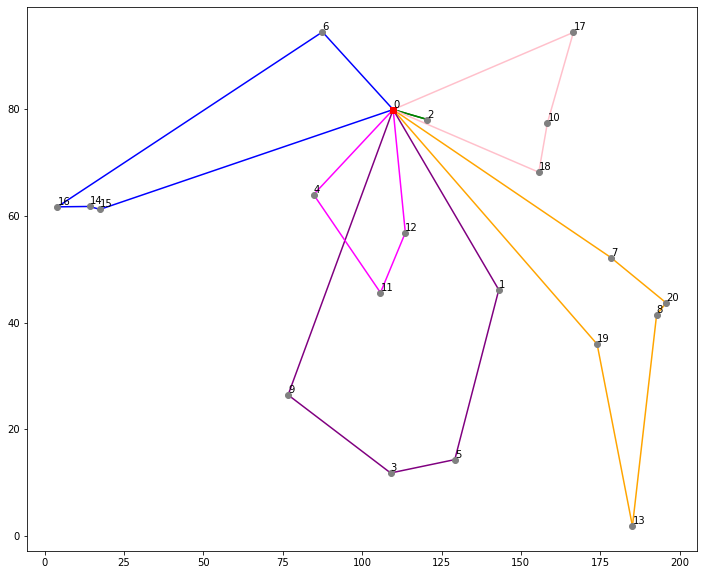

In [113]:

colors = cycle(['green', 'blue', 'orange', 'purple', 'magenta', 'pink', 'cyan'])

plt.figure(figsize=(12, 10))

for circle in route_circles:
    color = next(colors)
    for i, j in circle:
        plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c=color, zorder=0)
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='grey')

for i in V:
    plt.text(xc[i], yc[i], V[i], ha='left', va='bottom')
    
plt.show()